<a href="https://colab.research.google.com/github/Pooooj/HR-ATTRITION/blob/main/HR_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')
hr=pd.read_csv('/content/drive/MyDrive/HR Attrition/HR_Employee_Attrition_Dataset.csv')
data=hr.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.tail()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8
2939,2940,No,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
data.shape

(2940, 35)

In [ ]:
data.info()
cols = data.select_dtypes(['object'])
cols.columns

for i in cols.columns:
    data[i] = data[i].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


In [ ]:
data.describe(include=['category']).T

,count,unique,top,freq
Attrition,2940,2,No,2466
BusinessTravel,2940,3,Travel_Rarely,2086
Department,2940,3,Research & Development,1922
EducationField,2940,6,Life Sciences,1212
Gender,2940,2,Male,1764
JobRole,2940,9,Sales Executive,652
MaritalStatus,2940,3,Married,1346
Over18,2940,1,Y,2940
OverTime,2940,2,No,2108


In [ ]:
data.drop(['EmployeeNumber','EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [ ]:
cols_cat= data.select_dtypes(['category'])
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Attrition are :
Attrition
No     2466
Yes     474
Name: count, dtype: int64
**************************************************
Unique values in BusinessTravel are :
BusinessTravel
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: count, dtype: int64
**************************************************
Unique values in Department are :
Department
Research & Development    1922
Sales                      892
Human Resources            126
Name: count, dtype: int64
**************************************************
Unique values in EducationField are :
EducationField
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      1764
Female    1176
Name: count, dtype: int64
**************************************************
Unique va

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    # function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

    # function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

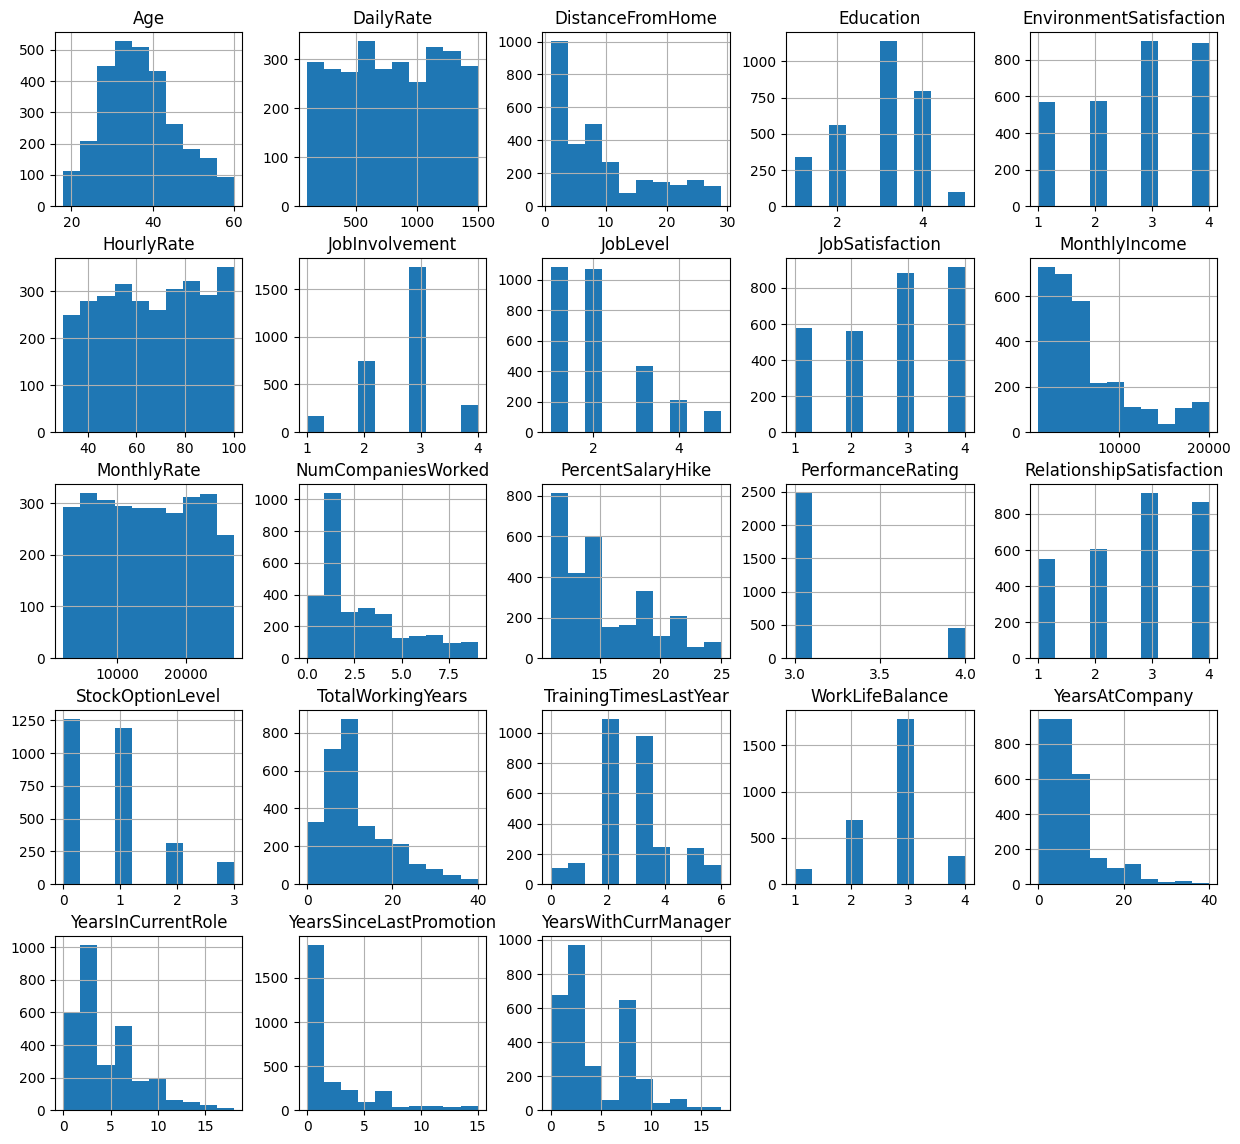

In [ ]:
# creating histograms
data.hist(figsize=(15, 14))
plt.show()

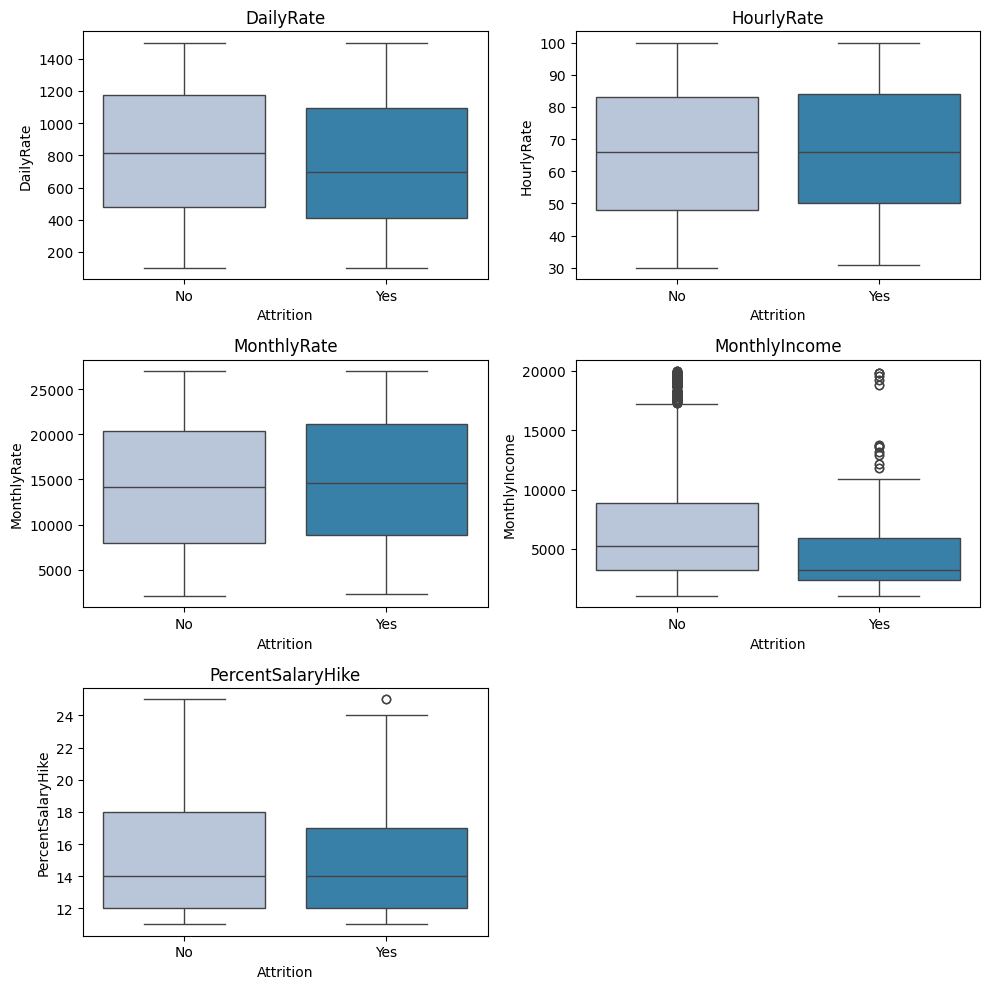

In [ ]:
cols = data[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome','PercentSalaryHike']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data=data,x="Attrition",y=variable,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

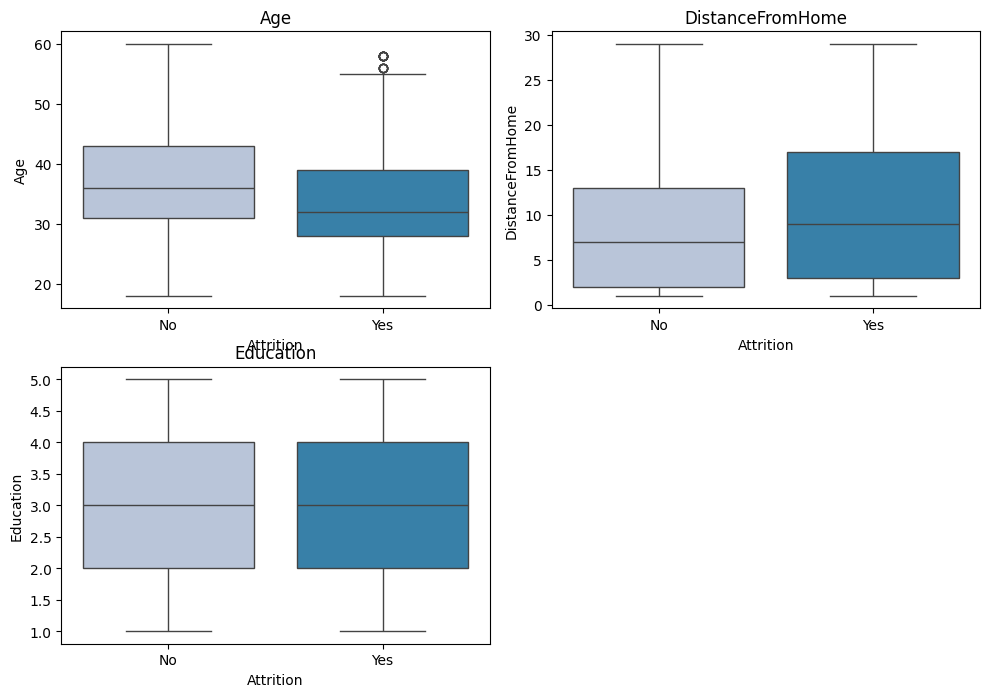

In [ ]:
cols = data[['Age','DistanceFromHome','Education']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data=data,x="Attrition",y=variable,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

Attrition    No  Yes   All
OverTime                  
All        2466  474  2940
Yes         578  254   832
No         1888  220  2108
------------------------------------------------------------------------------------------------------------------------


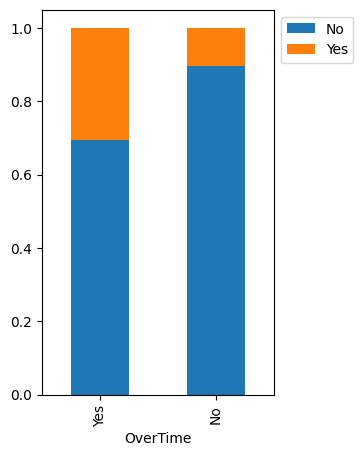

In [ ]:
stacked_barplot(data,"OverTime","Attrition")

Split the data

In [ ]:
X = data.drop(['Attrition'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(2058, 47) (882, 47)


In [ ]:
y.value_counts(1)

,proportion
Attrition,
0,0.838776
1,0.161224


In [ ]:
y_test.value_counts(1)

,proportion
Attrition,
0,0.839002
1,0.160998


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

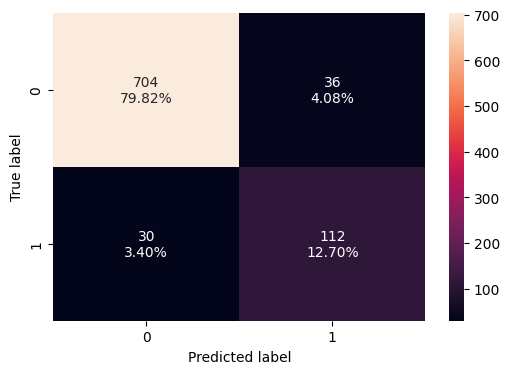

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

DECISION TREE

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.92517  0.788732   0.756757  0.772414


BAGGING CLASSIFIER

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

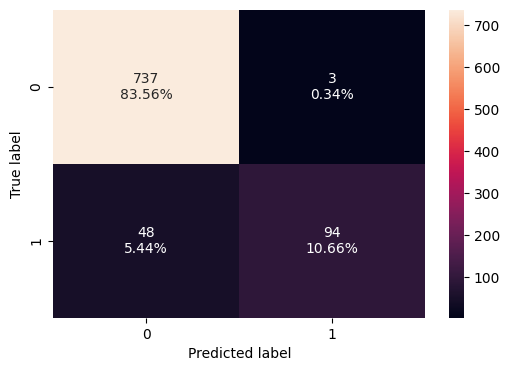

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993683  0.960843        1.0  0.980031


In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.942177  0.661972   0.969072  0.786611


Bagging Classifier with Weighted Desision Tree

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

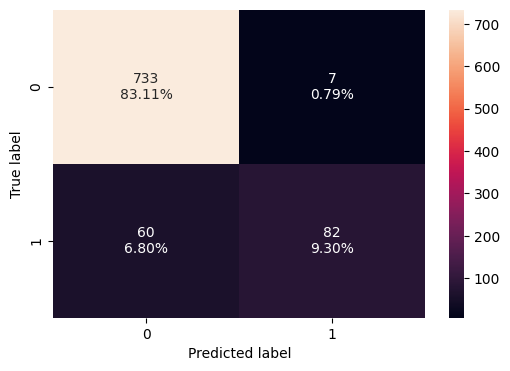

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [ ]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.989796  0.936747        1.0  0.967341


In [ ]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.924036  0.577465   0.921348  0.709957


Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

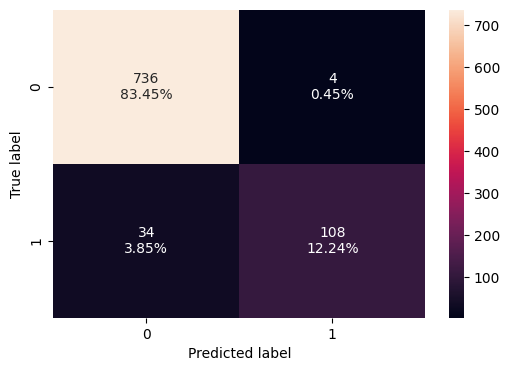

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.956916  0.760563   0.964286  0.850394


RANDOM FOREST WITH CLASS WEIGHTS

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

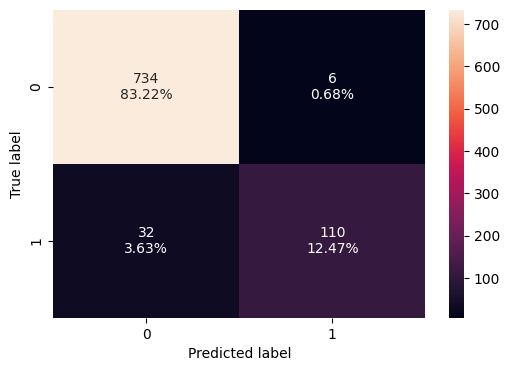

In [ ]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [ ]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.956916  0.774648   0.948276  0.852713


TUNING DECISION TREE CLASSIFIER

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15, None],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19, min_impurity_decrease=0.0001,
                       random_state=1)

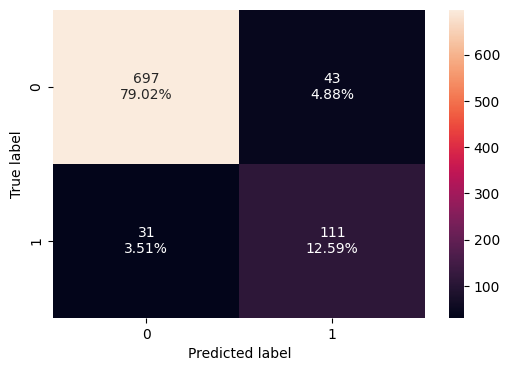

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.997085  0.981928        1.0  0.990881


In [ ]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision    F1
0    0.9161  0.78169   0.720779  0.75


TUNING BAG CLASSIFIER

In [ ]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [ ]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, n_estimators=101, random_state=1)

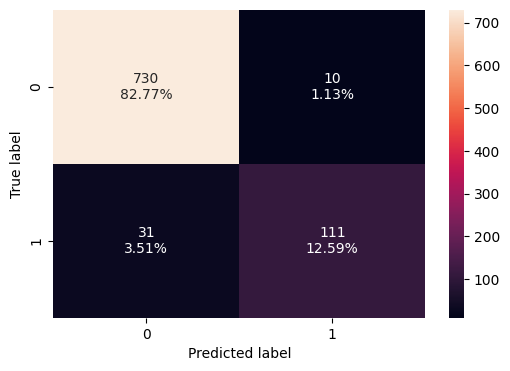

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [ ]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.953515  0.78169   0.917355  0.844106


TUNING RANDOM FOREST

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, n_estimators=110, random_state=1)

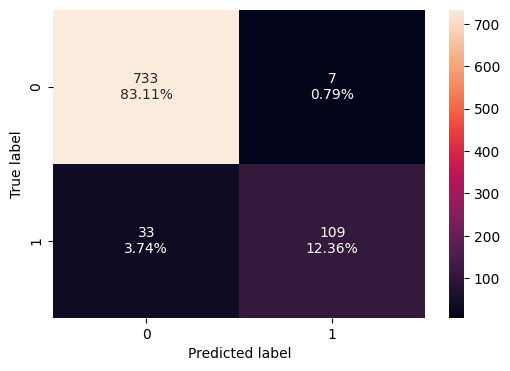

In [47]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [48]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [49]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.954649  0.767606   0.939655  0.844961


COMPARING ALL THE MODELS

In [50]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,1.0,0.993683,0.989796,1.0,1.0,0.997085,1.0,1.0
Recall,1.0,0.960843,0.936747,1.0,1.0,0.981928,1.0,1.0
Precision,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0
F1,1.0,0.980031,0.967341,1.0,1.0,0.990881,1.0,1.0


In [51]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,0.925170,0.942177,0.924036,0.956916,0.956916,0.916100,0.953515,0.954649
Recall,0.788732,0.661972,0.577465,0.760563,0.774648,0.781690,0.781690,0.767606
Precision,0.756757,0.969072,0.921348,0.964286,0.948276,0.720779,0.917355,0.939655
F1,0.772414,0.786611,0.709957,0.850394,0.852713,0.750000,0.844106,0.844961


FEATURE IMPORTANCE OF RANDOM FOREST

In [52]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
MonthlyIncome                      0.078408
OverTime_Yes                       0.057298
Age                                0.056918
TotalWorkingYears                  0.052522
DistanceFromHome                   0.048747
DailyRate                          0.048477
MonthlyRate                        0.047698
HourlyRate                         0.044066
YearsAtCompany                     0.036860
PercentSalaryHike                  0.030889
EmployeeNumber                     0.030385
YearsWithCurrManager               0.029913
NumCompaniesWorked                 0.028688
StockOptionLevel                   0.028329
TrainingTimesLastYear              0.027803
EnvironmentSatisfaction            0.025894
WorkLifeBalance                    0.025722
JobInvolvement                     0.025339
JobSatisfaction                    0.025232
YearsInCurrentRole                 0.024991
YearsSinceLastPromotion            0.024500
RelationshipSatisfaction        

In [53]:
feature_names = X_train.columns

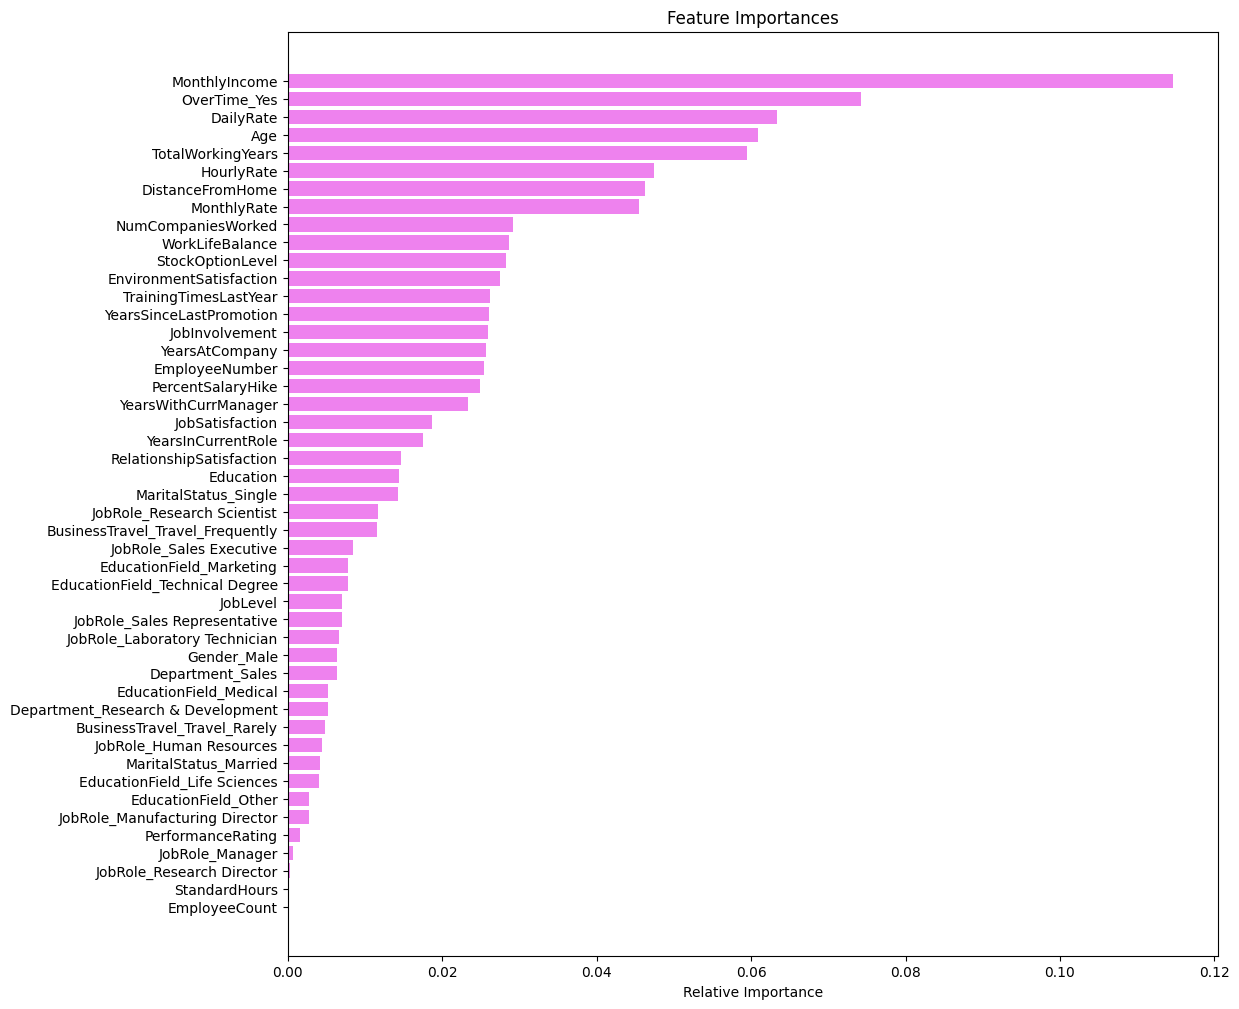

In [54]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()